# Medical Cost Personal Insurance Project

### Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

### Columns  

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance (output variable)




### Predict : 

Can you accurately predict insurance costs?




Data set: https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('Medical_Cost_Personal_Insurance_Project.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis EDA

In [5]:
df.shape

(1338, 7)

The medical costs personal insurance dataset contains 1338 rows and 7 columns.

In [6]:
#Checking the names of the columns

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#Checking the column types

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see from the above, there is no null values present in the dataset.

We have numerical and categorical data in our dataset.

<Axes: >

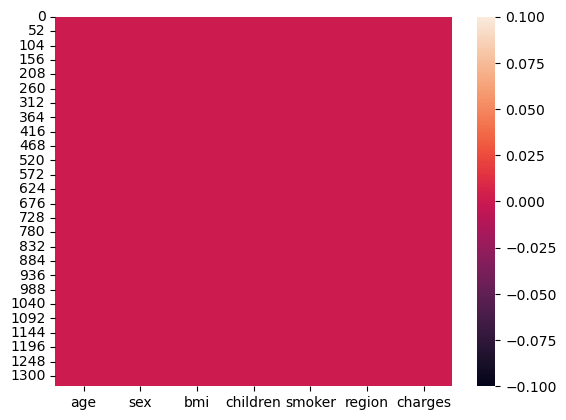

In [10]:
#We can also use heatmap to visualize if there is any null values presented

sns.heatmap(df.isnull())

We can clearly see that there is no any null values presented in this dataset.

In [11]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [12]:
df['charges'].nunique()

1337

In [13]:
#Lets check the value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

# Statistical Summary

In [15]:
#Statistical summary of numerical columns.

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observation:
    
1. We don't have missing values.
2. The mean and median value (50%) is near in age, bmi, children columns.
3. The mean value is higher than the median in Charges column, which means the data in charges column is skewed to the right.
4. The difference between the 75% and the max value in charges column is big, which means there's outliers present in our dataset.

In [16]:
#Statistical summary of categorical columns.

df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Observation:
    
The top and most frequent result in our dataset is male, non-smoker.

In [17]:
df.duplicated().sum()

1

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Visualization

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


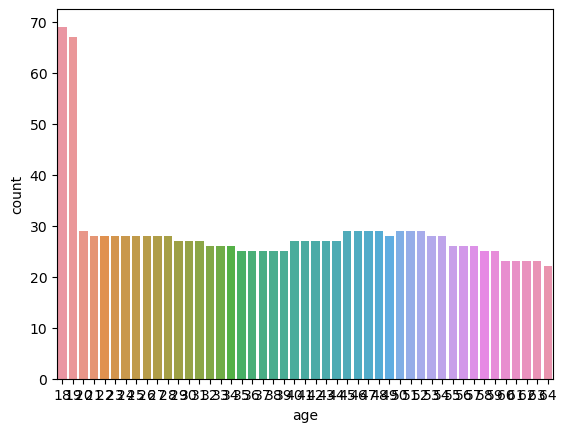

<Figure size 5000x500 with 0 Axes>

In [40]:
#Visualizing the count of age

print(df['age'].value_counts())
ax=sns.countplot(x='age', data=df)
plt.figure(figsize=(50,5))
plt.show()

The customers took medical insurance between age 18-19 is higher.

male      675
female    662
Name: sex, dtype: int64


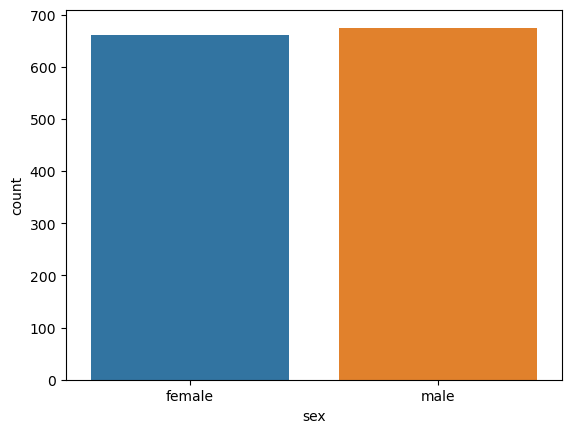

In [29]:
#Visualizing the count of gender

print(df['sex'].value_counts())
ax=sns.countplot(x='sex', data=df)
plt.show()

The total number of female and male customers is nearly the same. 

32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64


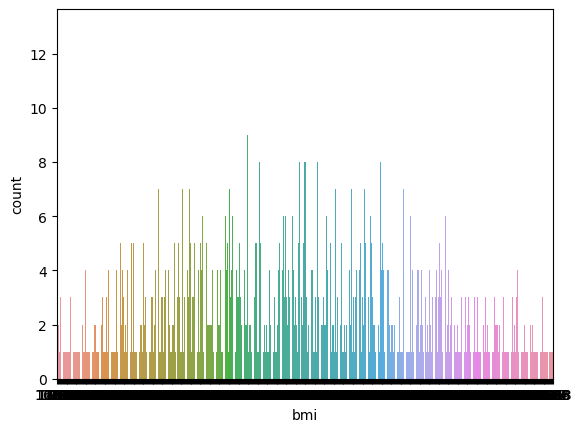

In [34]:
#Visualizing the count of bmi

print(df['bmi'].value_counts())
ax=sns.countplot(x='bmi', data=df)
plt.show()

The highest number of customers are with bmi above 28 which is the overweight range.

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


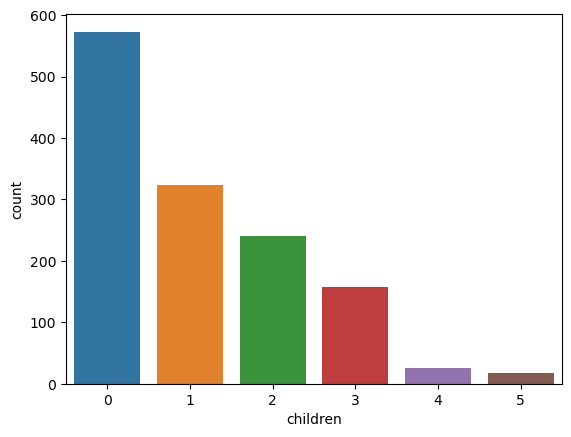

In [38]:
#Visualizing the count of children

print(df['children'].value_counts())
ax=sns.countplot(x='children', data=df)
plt.show()

Most of the customers took medical insurance have no children. With increasing the number of children the number of customers decrease.

no     1063
yes     274
Name: smoker, dtype: int64


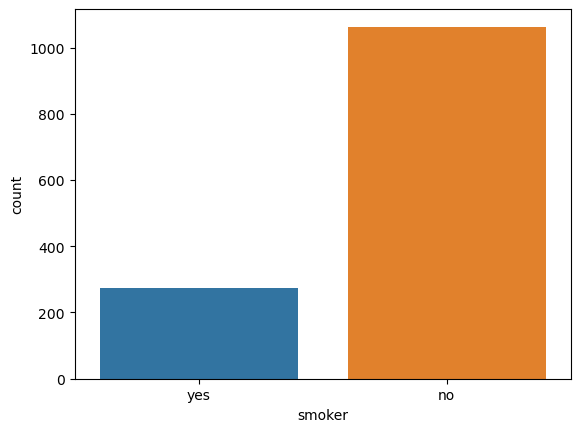

In [37]:
#Visualizing the count of smoker

print(df['smoker'].value_counts())
ax=sns.countplot(x='smoker', data=df)
plt.show()

Majority of the customers are non smokers.

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


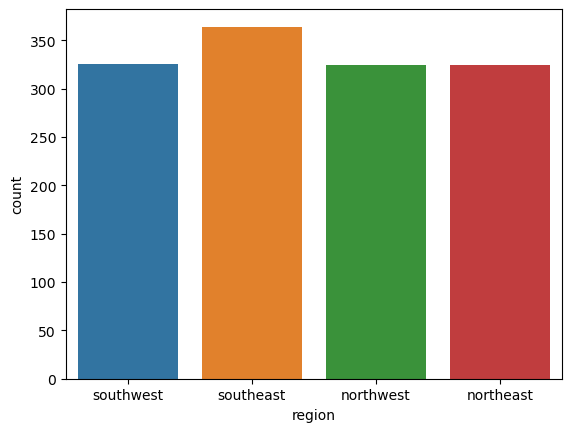

In [39]:
#Visualizing the count of region

print(df['region'].value_counts())
ax=sns.countplot(x='region', data=df)
plt.show()

The customers from southeast are slightly more compared to the other regions.

Text(0.5, 1.0, 'Age vs charges')

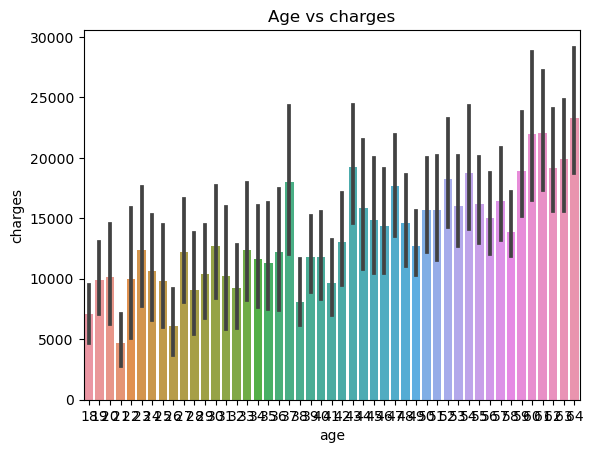

In [41]:
#Comparing age and charges.

sns.barplot(x='age', y='charges', data=df)
plt.title('Age vs charges')

With increase of the age of the customers the charges increase too.

Text(0.5, 1.0, 'Gender vs charges')

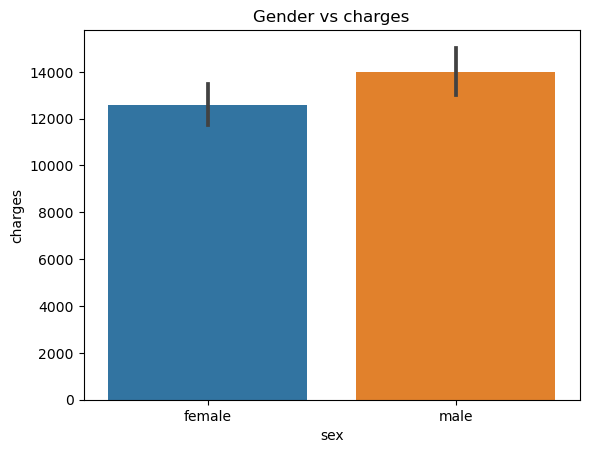

In [43]:
#Comparing gender and charges.

sns.barplot(x='sex', y='charges', data=df)
plt.title('Gender vs charges')

The insurance costs for males is slightly higher than for the females.

Text(0.5, 1.0, 'BMI vs charges')

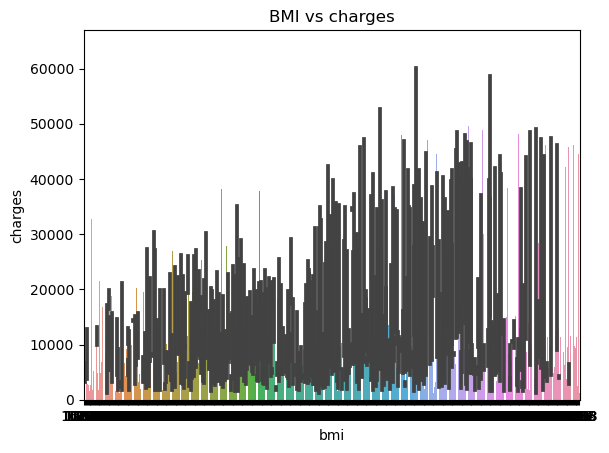

In [45]:
#Comparing bmi and charges.

sns.barplot(x='bmi', y='charges', data=df)
plt.title('BMI vs charges')

With increase of the bmi of the customers the charges increase too.

Text(0.5, 1.0, 'Number of children vs charges')

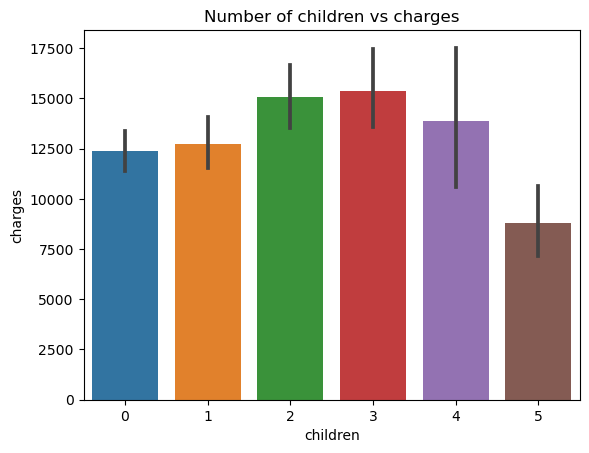

In [46]:
#Comparing number of children and charges.

sns.barplot(x='children', y='charges', data=df)
plt.title('Number of children vs charges')

The customenrs with 2,3 and 4 children are paying more than the rest.

Text(0.5, 1.0, 'Smoker/nonsmoker vs charges')

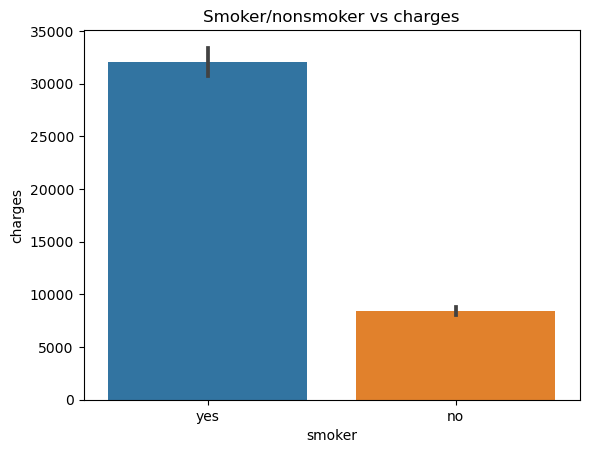

In [47]:
#Comparing smoker/nonsmoker and charges.

sns.barplot(x='smoker', y='charges', data=df)
plt.title('Smoker/nonsmoker vs charges')

The customers who are smokers paying significally more compared with the non smokers.

Text(0.5, 1.0, 'Region vs charges')

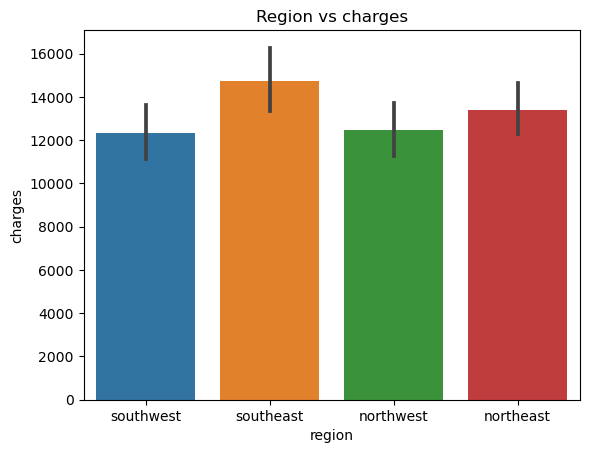

In [48]:
#Comparing region and charges.

sns.barplot(x='region', y='charges', data=df)
plt.title('Region vs charges')

The charges for customers living in southeast and northeast are slightly higher.

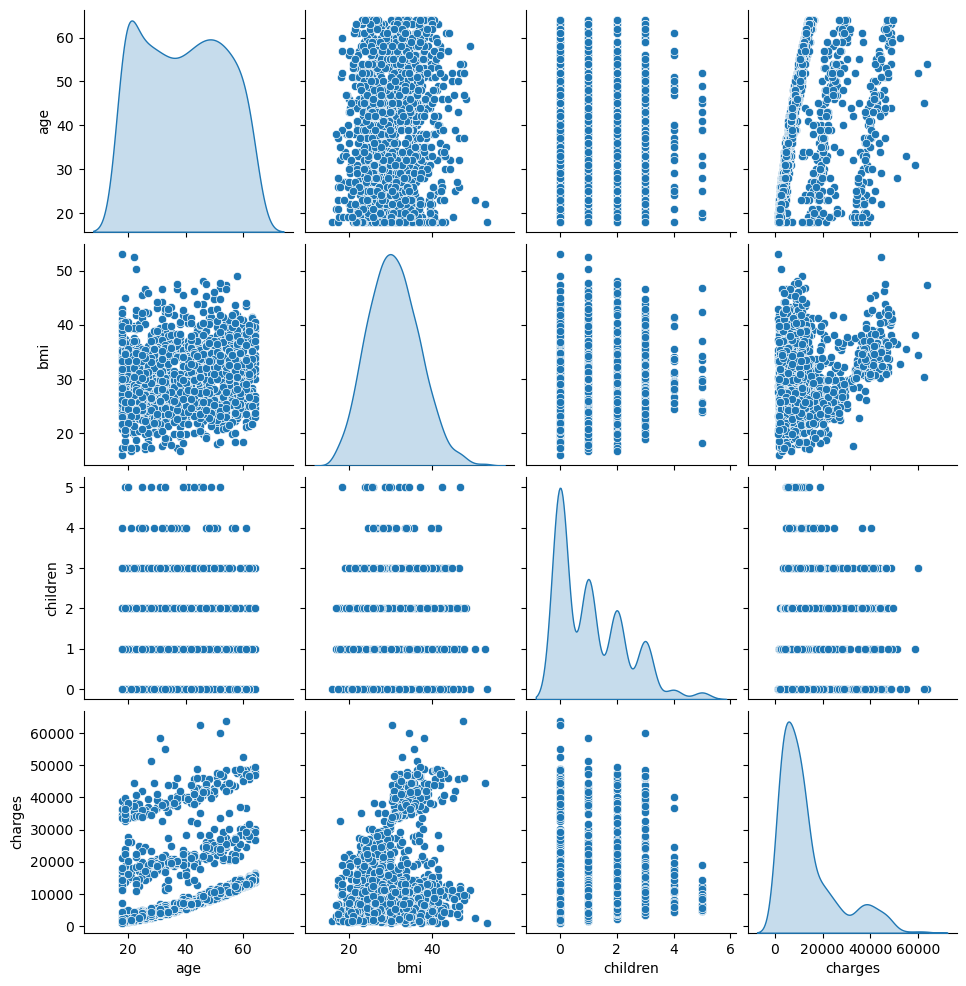

In [50]:
# Pairplot for Age, BMI, Charges

df_num = df[['age','bmi','charges']]
sns.pairplot(df, diag_kind = 'kde')
plt.show()

Observation

Based on above analysis we can say that smoking has a great impact on medical costs. Smoking in combination with an increase in other factors such as age, bmi and children further increases the medical cost.

# Checking for outliers

<Axes: xlabel='smoker', ylabel='charges'>

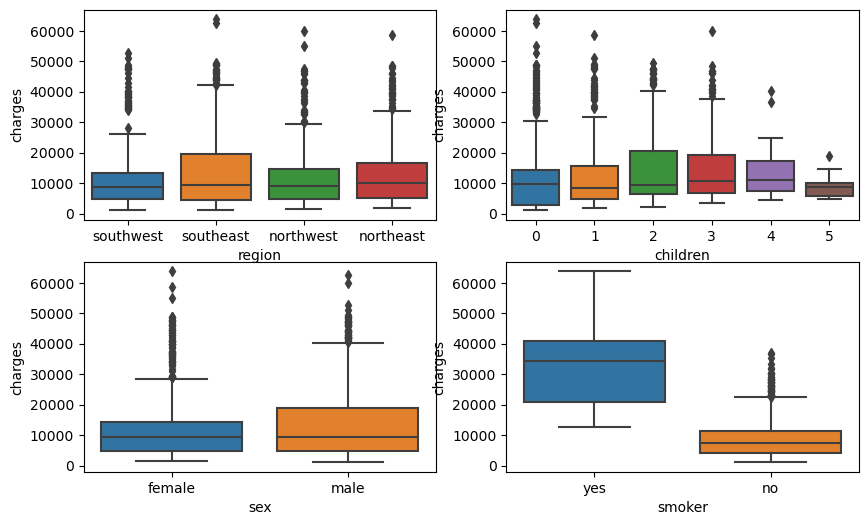

In [53]:
plt.figure (figsize = (10,6))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

Ouliers are presented.

### Checking for skewness.

In [54]:
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

The columns children and charges have skewness in the data. The data in both columns is continuous in nature. The skewness has to be removed.

### Removing skewness

In [56]:
#Using the cube root method

df['children']=np.cbrt(df['children'])
df['charges']=np.cbrt(df['charges'])

In [57]:
df.skew()

age         0.054781
bmi         0.283914
children   -0.098682
charges     0.515480
dtype: float64

The skewness has been reduced in children and charges column.

### Encoding categorical data

Medical Cost Personal Insurance dataset contains categorical and numerical data. The categorical data has to be to converted to numerical. For this purpose we gonna use the LabelEncoder.

In [67]:
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.sex = le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)
df.region = le.fit_transform(df.region)

df.dtypes

age           int64
sex           int32
bmi         float64
children    float64
smoker        int32
region        int32
charges     float64
dtype: object

In [70]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1,3,25.654666
1,18,1,33.770,1.00000,0,2,11.994331
2,28,1,33.000,1.44225,0,2,16.447599
3,33,1,22.705,0.00000,0,1,28.013799
4,32,1,28.880,0.00000,0,1,15.695891


Now our dataset has only numerical data.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 100.2 KB


### Statistical summary of all numerical data

In [73]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,0.690560,0.204936,1.516081,21.747756
std,14.044333,0.500163,6.100468,0.617605,0.403806,1.105208,6.605881
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,10.390777
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,16.805563
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,21.094181
75%,51.000000,1.000000,34.700000,1.259921,0.000000,2.000000,25.539075
max,64.000000,1.000000,53.130000,1.709976,1.000000,3.000000,39.952115


### Cheking the outliers

In [87]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children   -0.098682
smoker      1.463601
region     -0.039068
charges     0.116521
dtype: float64

The column smoker has outliers but it contains categorical data so there is no need to remove the outliers.

### Correlation between target variable and independent variables.

In [89]:
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.047775,-0.025587,0.001626,0.502920
sex,-0.019814,1.000000,0.046397,0.017024,0.076596,0.004936,0.014637
bmi,0.109344,0.046397,1.000000,0.016512,0.003746,0.157574,0.140765
children,0.047775,0.017024,0.016512,1.000000,0.011411,0.013750,0.153181
smoker,-0.025587,0.076596,0.003746,0.011411,1.000000,-0.002358,0.690795
region,0.001626,0.004936,0.157574,0.013750,-0.002358,1.000000,-0.039079
charges,0.502920,0.014637,0.140765,0.153181,0.690795,-0.039079,1.000000


<Axes: >

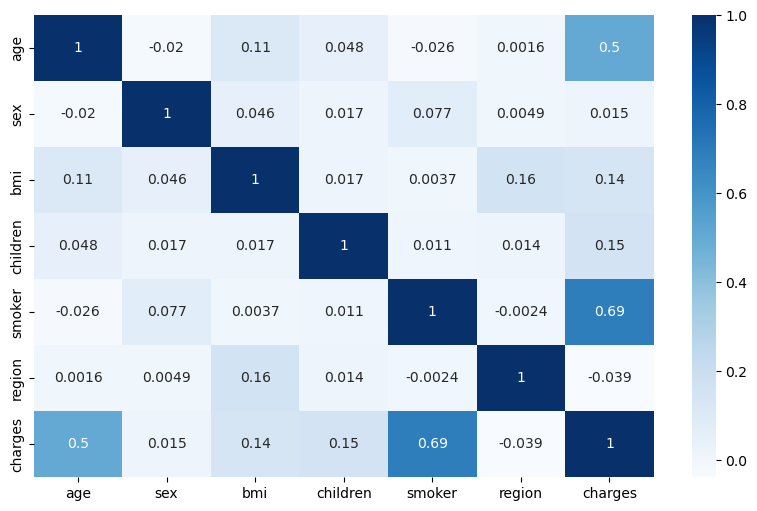

In [91]:
#Visualizing the correlation matrix by plotting heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

Observation:
    
1. The column smoker, followed by age, bmi and children are highly correlated with the medical charges.
2. The region is negatively correlated to the charges.

### Checking Variance Inflation Factor VIF

In [95]:
x=df.drop('charges', axis=1)
y=df['charges']

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,7.589964,age
1,2.000471,sex
2,10.557361,bmi
3,2.202748,children
4,1.257482,smoker
5,2.924288,region


# Machine Learning

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Creating train test split

In [154]:
x=df.drop('charges', axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0.00000,1.0,3
1,18,1,33.770,1.00000,0.0,2
2,28,1,33.000,1.44225,0.0,2
3,33,1,22.705,0.00000,0.0,1
4,32,1,28.880,0.00000,0.0,1


In [155]:
y=df['charges']
y.head()

0    2.949322
1    2.289068
2    2.543124
3    3.037088
4    2.503775
Name: charges, dtype: float64

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [157]:
x_train.shape

(935, 6)

In [158]:
y_train.shape

(935,)

In [159]:
x_test.shape

(402, 6)

In [160]:
y_test.shape

(402,)

## Linear Regression

Our dependent variable (charges) is continuous data, that means that is regression problem. So I am using Linear Regression to train the model and to predict the medical insurance costs.

In [161]:
lr=LinearRegression()

In [162]:
lr.fit(x_train,y_train)

LinearRegression()

In [191]:
lr.score(x_train, y_train)

0.77753299480859

Nealrby 78%

In [163]:
#Prediction of insurance cost

lrpred=lr.predict(x_test)
lrpred

array([2.51797305, 2.51050556, 2.83872883, 2.76948284, 3.20942608,
       2.602236  , 2.69533032, 2.48621672, 3.21749697, 2.8848965 ,
       2.68328391, 2.52862685, 2.45272249, 3.02276657, 3.22358705,
       3.08440763, 2.50259928, 2.72953537, 2.56024867, 2.56303685,
       3.065178  , 2.72148054, 2.91237669, 2.70365434, 2.50752562,
       2.56424978, 3.12581467, 2.68051518, 2.59582732, 2.61439374,
       2.61000421, 2.71213277, 2.66207929, 2.75418931, 2.66907365,
       2.7851553 , 2.90526333, 2.70161933, 2.85802232, 2.82501186,
       2.48941974, 3.20770696, 2.60026725, 2.44905402, 2.77180363,
       2.84047124, 2.83872233, 3.21403496, 3.24302729, 2.40362137,
       2.73684348, 2.83745042, 2.64735805, 3.26983605, 2.75147148,
       2.82599316, 2.49807028, 2.70389491, 2.54762191, 2.73608656,
       2.67884718, 3.29737419, 2.72131359, 2.80122055, 2.6282273 ,
       2.92657241, 2.58066575, 2.48856395, 2.38440064, 2.87358984,
       2.96550286, 2.9008326 , 2.39875977, 2.45014646, 3.23321

In [166]:
print('R2_score: ', r2_score(y_test,lrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,lrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,lrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,lrpred)))

R2_score:  0.7613742093869262
Mean Absolute Error:  0.0856183458444227
Mean Squared Error:  0.018349795513982563
Root Mean Squared Error:  0.1354614170676749


# Prediction the medical insurance costs by providing new values

In [190]:
#New customer is 43 years old, male, with bmi 27, 2 children, smoker, from southwest region.

data = {'age':43, 'sex': 1, 'bmi':27, 'children':2, 'smoker':1, 'region':3}
index=[0]
new_customer=pd.DataFrame(data,index)
new_customer

,age,sex,bmi,children,smoker,region
0,43,1,27,2,1,3


In [189]:
cost_predict=lr.predict(new_customer)
print("The medical insurance cost of the new customer is: ", cost_predict)

The medical insurance cost of the new customer is:  [3.2253335]


# Saving the model

In [192]:
df1=pd.DataFrame(lrpred)
df1.to_csv('medical_insurance_prediction_costs.csv')